# Asg-9 template

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.Def_TM     import *
from jove.Def_md2mc  import *
from jove.DotBashers import *
from jove.JoveEditor import *
from jove.Def_PDA    import *
from jove.AnimateTM import * #-- usage: AnimateTM(whas101DTM, FuseEdges=True)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(step_tm)
help(run_tm)
help(explore_tm)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

 "help(JoveEditor)" gives you info on the generic animation panel that animates all machines. 


# Problem 6, Page 159, the "OR" case.
## Test your CFG below for 

$ \{ a^i c^k b^j d^l \;:\; (i==j)\; OR\; (k==l)\}$

## Note that for the CFG that is to be simulated using Jove's PDA, the nonterminals must be only a single letter (i.e. if you used a nonterminals "As" for one or more a, and you pushed As on the stack, it will be interpreted as "A" followed by "s").

In [2]:
# Type the CFG in the comments of the PDA
# Then convert to PDA and run the tests below

pda_acbd = md2mc(
'''
PDA

!!---Initially I'll write using multi-letter nonterminals...
!!   Then I'll turn them into single-letter nonterminals.
!!
!! S -> Ai_Cs_Bi Ds | As Ci_Bs_Di
!! As -> a As | ''
!! Bs -> b Bs | ''
!! Cs -> c Cs | ''
!! Ds -> d Ds | ''
!! Ai_Cs_Bi -> a Ai_Cs_Bi b | Cs
!! Ci_Bs_Di -> c Ci_Bs_Di d | Bs


!!---Now turning into single-letter non-terminals
!!---To avoid the dual-use of "S", the second use is "Z"
!!
!! S -> TD | AU
!! A -> aA | ''
!! B -> bB | ''
!! C -> cC | ''
!! D -> dD | ''
!! T -> aTb | C
!! U -> cUd | B


!!-- PDA below

I: '', ''; S -> M
M: '', #; # -> F

M: a, a; '' -> M
M: b, b; '' -> M
M: c, c; '' -> M
M: d, d; '' -> M

M: '', S; TD -> M
M: '', S; AU -> M

M: '', T; aTb -> M
M: '', T; C -> M

M: '', U; cUd -> M
M: '', U; B -> M

M: '', A; aA -> M
M: '', A; '' -> M

M: '', B; bB -> M
M: '', B; '' -> M

M: '', C; cC -> M
M: '', C; '' -> M

M: '', D; dD -> M
M: '', D; '' -> M
''')

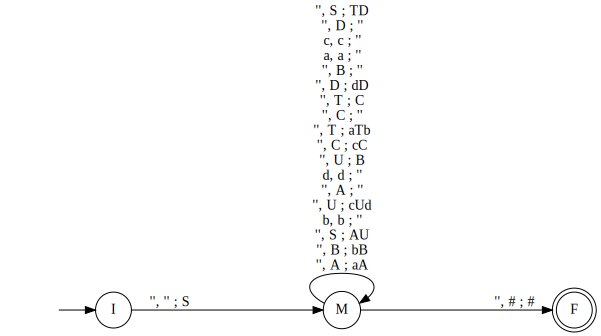

In [3]:
dotObj_pda(pda_acbd, FuseEdges=True)

In [4]:
explore_pda("acbd", pda_acbd)

String acbd accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'acbd', '#')
->  ('M', 'acbd', 'S#')
->  ('M', 'acbd', 'TD#')
->  ('M', 'acbd', 'aTbD#')
->  ('M', 'cbd', 'TbD#')
->  ('M', 'cbd', 'CbD#')
->  ('M', 'cbd', 'cCbD#')
->  ('M', 'bd', 'CbD#')
->  ('M', 'bd', 'bD#')
->  ('M', 'd', 'D#')
->  ('M', 'd', 'dD#')
->  ('M', '', 'D#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'acbd', '#')
->  ('M', 'acbd', 'S#')
->  ('M', 'acbd', 'AU#')
->  ('M', 'acbd', 'aAU#')
->  ('M', 'cbd', 'AU#')
->  ('M', 'cbd', 'U#')
->  ('M', 'cbd', 'cUd#')
->  ('M', 'bd', 'Ud#')
->  ('M', 'bd', 'Bd#')
->  ('M', 'bd', 'bBd#')
->  ('M', 'd', 'Bd#')
->  ('M', 'd', 'd#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [5]:
explore_pda("aacbbd", pda_acbd)

String aacbbd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aacbbd', '#')
->  ('M', 'aacbbd', 'S#')
->  ('M', 'aacbbd', 'TD#')
->  ('M', 'aacbbd', 'aTbD#')
->  ('M', 'acbbd', 'TbD#')
->  ('M', 'acbbd', 'aTbbD#')
->  ('M', 'cbbd', 'TbbD#')
->  ('M', 'cbbd', 'CbbD#')
->  ('M', 'cbbd', 'cCbbD#')
->  ('M', 'bbd', 'CbbD#')
->  ('M', 'bbd', 'bbD#')
->  ('M', 'bd', 'bD#')
->  ('M', 'd', 'D#')
->  ('M', 'd', 'dD#')
->  ('M', '', 'D#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [6]:
explore_pda("aaaccbbbddd", pda_acbd)

String aaaccbbbddd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaaccbbbddd', '#')
->  ('M', 'aaaccbbbddd', 'S#')
->  ('M', 'aaaccbbbddd', 'TD#')
->  ('M', 'aaaccbbbddd', 'aTbD#')
->  ('M', 'aaccbbbddd', 'TbD#')
->  ('M', 'aaccbbbddd', 'aTbbD#')
->  ('M', 'accbbbddd', 'TbbD#')
->  ('M', 'accbbbddd', 'aTbbbD#')
->  ('M', 'ccbbbddd', 'TbbbD#')
->  ('M', 'ccbbbddd', 'CbbbD#')
->  ('M', 'ccbbbddd', 'cCbbbD#')
->  ('M', 'cbbbddd', 'CbbbD#')
->  ('M', 'cbbbddd', 'cCbbbD#')
->  ('M', 'bbbddd', 'CbbbD#')
->  ('M', 'bbbddd', 'bbbD#')
->  ('M', 'bbddd', 'bbD#')
->  ('M', 'bddd', 'bD#')
->  ('M', 'ddd', 'D#')
->  ('M', 'ddd', 'dD#')
->  ('M', 'dd', 'D#')
->  ('M', 'dd', 'dD#')
->  ('M', 'd', 'D#')
->  ('M', 'd', 'dD#')
->  ('M', '', 'D#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [7]:
explore_pda("aaaacccbbbddd", pda_acbd)

String aaaacccbbbddd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaaacccbbbddd', '#')
->  ('M', 'aaaacccbbbddd', 'S#')
->  ('M', 'aaaacccbbbddd', 'AU#')
->  ('M', 'aaaacccbbbddd', 'aAU#')
->  ('M', 'aaacccbbbddd', 'AU#')
->  ('M', 'aaacccbbbddd', 'aAU#')
->  ('M', 'aacccbbbddd', 'AU#')
->  ('M', 'aacccbbbddd', 'aAU#')
->  ('M', 'acccbbbddd', 'AU#')
->  ('M', 'acccbbbddd', 'aAU#')
->  ('M', 'cccbbbddd', 'AU#')
->  ('M', 'cccbbbddd', 'U#')
->  ('M', 'cccbbbddd', 'cUd#')
->  ('M', 'ccbbbddd', 'Ud#')
->  ('M', 'ccbbbddd', 'cUdd#')
->  ('M', 'cbbbddd', 'Udd#')
->  ('M', 'cbbbddd', 'cUddd#')
->  ('M', 'bbbddd', 'Uddd#')
->  ('M', 'bbbddd', 'Bddd#')
->  ('M', 'bbbddd', 'bBddd#')
->  ('M', 'bbddd', 'Bddd#')
->  ('M', 'bbddd', 'bBddd#')
->  ('M', 'bddd', 'Bddd#')
->  ('M', 'bddd', 'bBddd#')
->  ('M', 'ddd', 'Bddd#')
->  ('M', 'ddd', 'ddd#')
->  ('M', 'dd', 'dd#')
->  ('M', 'd', 'd#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [8]:
explore_pda("aaaacccbbbdddd", pda_acbd)

String aaaacccbbbdddd rejected by your PDA :-(
Visited states are:
{('M', 'cccbbbdddd', '#'), ('M', 'aaaacccbbbdddd', 'TD#'), ('M', 'aacccbbbdddd', 'U#'), ('M', 'acccbbbdddd', 'U#'), ('M', 'aaaacccbbbdddd', 'S#'), ('M', 'cccbbbdddd', 'CbbbbD#'), ('M', 'acccbbbdddd', 'bbbD#'), ('M', 'acccbbbdddd', 'CbbbD#'), ('M', 'bdddd', 'bBddd#'), ('M', 'aaaacccbbbdddd', 'cUd#'), ('M', 'aaacccbbbdddd', 'U#'), ('M', 'aaaacccbbbdddd', 'bB#'), ('M', 'ccbbbdddd', 'cUdd#'), ('M', 'acccbbbdddd', 'bB#'), ('M', 'aaaacccbbbdddd', 'dD#'), ('M', 'bbbdddd', 'Uddd#'), ('M', 'bbdddd', 'Bddd#'), ('M', 'aaaacccbbbdddd', 'cCD#'), ('M', 'acccbbbdddd', 'aAU#'), ('M', 'aaaacccbbbdddd', 'D#'), ('M', 'cccbbbdddd', 'TbbbbD#'), ('M', 'bbbdddd', 'bBddd#'), ('M', 'acccbbbdddd', 'AU#'), ('M', 'bdddd', 'Bddd#'), ('M', 'cbbbdddd', 'bbbbD#'), ('M', 'ccbbbdddd', 'bBd#'), ('M', 'ccbbbdddd', 'cCbbbbD#'), ('M', 'ccbbbdddd', 'Bd#'), ('M', 'aaaacccbbbdddd', 'aTbD#'), ('M', 'cccbbbdddd', 'cCbbbbD#'), ('M', 'dddd', 'bBddd#'), ('M', 'aaac

In [9]:
explore_pda("aaaabbbb", pda_acbd)

String aaaabbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaaabbbb', '#')
->  ('M', 'aaaabbbb', 'S#')
->  ('M', 'aaaabbbb', 'TD#')
->  ('M', 'aaaabbbb', 'aTbD#')
->  ('M', 'aaabbbb', 'TbD#')
->  ('M', 'aaabbbb', 'aTbbD#')
->  ('M', 'aabbbb', 'TbbD#')
->  ('M', 'aabbbb', 'aTbbbD#')
->  ('M', 'abbbb', 'TbbbD#')
->  ('M', 'abbbb', 'aTbbbbD#')
->  ('M', 'bbbb', 'TbbbbD#')
->  ('M', 'bbbb', 'CbbbbD#')
->  ('M', 'bbbb', 'bbbbD#')
->  ('M', 'bbb', 'bbbD#')
->  ('M', 'bb', 'bbD#')
->  ('M', 'b', 'bD#')
->  ('M', '', 'D#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [10]:
explore_pda("aaaabbb", pda_acbd)

String aaaabbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaaabbb', '#')
->  ('M', 'aaaabbb', 'S#')
->  ('M', 'aaaabbb', 'AU#')
->  ('M', 'aaaabbb', 'aAU#')
->  ('M', 'aaabbb', 'AU#')
->  ('M', 'aaabbb', 'aAU#')
->  ('M', 'aabbb', 'AU#')
->  ('M', 'aabbb', 'aAU#')
->  ('M', 'abbb', 'AU#')
->  ('M', 'abbb', 'aAU#')
->  ('M', 'bbb', 'AU#')
->  ('M', 'bbb', 'U#')
->  ('M', 'bbb', 'B#')
->  ('M', 'bbb', 'bB#')
->  ('M', 'bb', 'B#')
->  ('M', 'bb', 'bB#')
->  ('M', 'b', 'B#')
->  ('M', 'b', 'bB#')
->  ('M', '', 'B#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [11]:
explore_pda("aaaabbbd", pda_acbd)

String aaaabbbd rejected by your PDA :-(
Visited states are:
{('M', 'bbbd', 'B#'), ('M', 'bbbd', 'bbbbD#'), ('M', 'bd', 'B#'), ('F', 'bd', '#'), ('M', 'aaaabbbd', '#'), ('M', 'aaaabbbd', 'aTbD#'), ('M', 'aaabbbd', 'U#'), ('M', 'bbd', '#'), ('F', 'abbbd', '#'), ('M', 'aaaabbbd', 'AU#'), ('M', 'd', 'bD#'), ('F', 'bbd', '#'), ('M', 'bd', 'bbD#'), ('M', 'aabbbd', 'aAU#'), ('M', 'abbbd', 'bbbD#'), ('M', 'abbbd', 'CbbbD#'), ('M', 'aaabbbd', 'TbD#'), ('M', 'aaabbbd', 'B#'), ('M', 'abbbd', '#'), ('M', 'abbbd', 'bB#'), ('M', 'bbbd', 'TbbbbD#'), ('M', 'aabbbd', 'aTbbbD#'), ('M', 'aaabbbd', 'cCbD#'), ('M', 'abbbd', 'B#'), ('M', 'aaaabbbd', 'B#'), ('M', 'aaaabbbd', 'bB#'), ('M', 'aaabbbd', 'bB#'), ('M', 'aabbbd', 'AU#'), ('M', 'aaaabbbd', 'U#'), ('M', 'bbbd', 'cCbbbbD#'), ('M', 'aaabbbd', '#'), ('M', 'aabbbd', 'CbbD#'), ('M', 'aabbbd', 'bbD#'), ('M', 'abbbd', 'TbbbD#'), ('M', 'bbbd', 'cUd#'), ('M', 'abbbd', 'U#'), ('M', 'aaaabbbd', 'CD#'), ('M', 'bd', 'bB#'), ('M', 'aaabbbd', 'AU#'), ('M', 'bbbd',

In [12]:
explore_pda("aaaacbbb", pda_acbd)

String aaaacbbb rejected by your PDA :-(
Visited states are:
{('M', '', 'bD#'), ('M', 'cbbb', 'TbbbbD#'), ('M', 'cbbb', 'aAU#'), ('M', 'cbbb', '#'), ('M', 'aaacbbb', 'CbD#'), ('M', 'bb', 'Bd#'), ('M', 'acbbb', '#'), ('M', 'aacbbb', 'bbD#'), ('M', 'aaacbbb', 'aAU#'), ('M', 'aaaacbbb', 'U#'), ('M', 'bb', 'd#'), ('M', 'aacbbb', 'B#'), ('M', 'cbbb', 'cCbbbbD#'), ('M', 'bbb', 'Ud#'), ('M', 'aacbbb', 'cCbbD#'), ('M', 'aaaacbbb', 'CD#'), ('M', 'aacbbb', 'TbbD#'), ('M', 'aaaacbbb', 'B#'), ('M', 'aacbbb', '#'), ('M', 'bbb', 'd#'), ('M', 'cbbb', 'B#'), ('M', 'cbbb', 'bbbbD#'), ('M', '', 'd#'), ('M', 'aaacbbb', 'AU#'), ('M', 'aacbbb', 'U#'), ('M', 'aaaacbbb', 'bB#'), ('M', 'cbbb', 'bB#'), ('M', 'bbb', 'CbbbbD#'), ('M', 'aaaacbbb', '#'), ('M', 'cbbb', 'U#'), ('M', 'acbbb', 'cCbbbD#'), ('M', 'b', 'Bd#'), ('M', 'aaaacbbb', 'AU#'), ('M', 'b', 'bBd#'), ('F', 'aaaacbbb', '#'), ('M', 'aaacbbb', 'cUd#'), ('M', 'aacbbb', 'bB#'), ('M', 'aaaacbbb', 'cCD#'), ('M', 'acbbb', 'U#'), ('M', 'aaaacbbb', 'aTbD#'), 

## Now, provide five of your own tests and run them; cover more interesting cases that are likely not covered by the above tests (or if covered, try to find new variations with respect to the numbers of various symbols.

In [13]:
# T1 : aim of the test is i=j=k=l=0; should accept
explore_pda("", pda_acbd)

String  accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '', '#')
->  ('M', '', 'S#')
->  ('M', '', 'TD#')
->  ('M', '', 'CD#')
->  ('M', '', 'D#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '', '#')
->  ('M', '', 'S#')
->  ('M', '', 'AU#')
->  ('M', '', 'U#')
->  ('M', '', 'B#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [14]:
# T2 : aim of the test is i=j=0; should accept
explore_pda("cdd", pda_acbd)

String cdd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'cdd', '#')
->  ('M', 'cdd', 'S#')
->  ('M', 'cdd', 'TD#')
->  ('M', 'cdd', 'CD#')
->  ('M', 'cdd', 'cCD#')
->  ('M', 'dd', 'CD#')
->  ('M', 'dd', 'D#')
->  ('M', 'dd', 'dD#')
->  ('M', 'd', 'D#')
->  ('M', 'd', 'dD#')
->  ('M', '', 'D#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [15]:
# T3 : aim of the test is i=j and k=l; should accept
explore_pda("aaaacbbbbd", pda_acbd)

String aaaacbbbbd accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaaacbbbbd', '#')
->  ('M', 'aaaacbbbbd', 'S#')
->  ('M', 'aaaacbbbbd', 'TD#')
->  ('M', 'aaaacbbbbd', 'aTbD#')
->  ('M', 'aaacbbbbd', 'TbD#')
->  ('M', 'aaacbbbbd', 'aTbbD#')
->  ('M', 'aacbbbbd', 'TbbD#')
->  ('M', 'aacbbbbd', 'aTbbbD#')
->  ('M', 'acbbbbd', 'TbbbD#')
->  ('M', 'acbbbbd', 'aTbbbbD#')
->  ('M', 'cbbbbd', 'TbbbbD#')
->  ('M', 'cbbbbd', 'CbbbbD#')
->  ('M', 'cbbbbd', 'cCbbbbD#')
->  ('M', 'bbbbd', 'CbbbbD#')
->  ('M', 'bbbbd', 'bbbbD#')
->  ('M', 'bbbd', 'bbbD#')
->  ('M', 'bbd', 'bbD#')
->  ('M', 'bd', 'bD#')
->  ('M', 'd', 'D#')
->  ('M', 'd', 'dD#')
->  ('M', '', 'D#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [16]:
# T4 : aim of the test is out of order; should reject
explore_pda("aabbc", pda_acbd)

String aabbc rejected by your PDA :-(
Visited states are:
{('M', 'aabbc', 'D#'), ('M', 'bbc', 'TbbD#'), ('M', 'aabbc', '#'), ('M', 'abbc', 'cUd#'), ('M', 'aabbc', 'U#'), ('M', 'abbc', 'TbD#'), ('M', 'c', 'dD#'), ('M', 'bbc', '#'), ('M', 'bbc', 'U#'), ('M', 'abbc', 'aTbbD#'), ('M', 'abbc', 'B#'), ('F', 'bc', '#'), ('F', 'abbc', '#'), ('M', 'c', 'bB#'), ('M', 'aabbc', 'bB#'), ('M', 'bbc', 'bB#'), ('M', 'bc', 'bD#'), ('M', 'aabbc', 'aAU#'), ('M', 'c', 'D#'), ('M', 'bbc', 'aAU#'), ('F', 'aabbc', '#'), ('M', 'aabbc', 'cCD#'), ('M', 'bbc', 'aTbbbD#'), ('M', 'bc', 'bB#'), ('M', 'aabbc', 'AU#'), ('M', 'bc', '#'), ('M', 'bbc', 'AU#'), ('M', 'c', '#'), ('M', 'abbc', 'AU#'), ('M', 'abbc', 'bD#'), ('M', 'aabbc', 'dD#'), ('M', 'abbc', 'CbD#'), ('M', 'bbc', 'bbD#'), ('F', 'c', '#'), ('M', 'c', 'B#'), ('M', 'abbc', 'aAU#'), ('M', 'bbc', 'cCbbD#'), ('M', 'abbc', 'cCbD#'), ('F', 'bbc', '#'), ('M', 'bc', 'B#'), ('M', 'aabbc', 'S#'), ('M', 'aabbc', 'aTbD#'), ('M', 'aabbc', 'cUd#'), ('M', 'aabbc', 'TD#'),

In [17]:
# T5 : aim of the test is out of order; should reject
explore_pda("aadbb", pda_acbd)

String aadbb rejected by your PDA :-(
Visited states are:
{('M', 'adbb', 'aAU#'), ('M', 'dbb', 'AU#'), ('M', 'dbb', 'aTbbbD#'), ('M', 'aadbb', '#'), ('M', 'aadbb', 'D#'), ('M', 'aadbb', 'CD#'), ('M', 'aadbb', 'cUd#'), ('M', 'adbb', 'aTbbD#'), ('I', 'aadbb', '#'), ('M', 'dbb', 'CbbD#'), ('M', 'adbb', 'AU#'), ('M', 'adbb', 'cUd#'), ('M', 'aadbb', 'bB#'), ('M', 'dbb', 'B#'), ('M', 'aadbb', 'cCD#'), ('M', 'adbb', '#'), ('M', 'dbb', 'bbD#'), ('M', 'aadbb', 'dD#'), ('M', 'adbb', 'CbD#'), ('M', 'aadbb', 'aAU#'), ('M', 'dbb', '#'), ('M', 'dbb', 'U#'), ('M', 'adbb', 'bB#'), ('M', 'dbb', 'cCbbD#'), ('M', 'dbb', 'TbbD#'), ('M', 'aadbb', 'AU#'), ('M', 'adbb', 'cCbD#'), ('M', 'dbb', 'cUd#'), ('F', 'adbb', '#'), ('M', 'adbb', 'B#'), ('M', 'adbb', 'bD#'), ('M', 'adbb', 'TbD#'), ('F', 'dbb', '#'), ('M', 'aadbb', 'B#'), ('M', 'aadbb', 'aTbD#'), ('M', 'aadbb', 'TD#'), ('M', 'dbb', 'bB#'), ('M', 'adbb', 'U#'), ('M', 'aadbb', 'S#'), ('M', 'aadbb', 'U#'), ('M', 'dbb', 'aAU#'), ('F', 'aadbb', '#')}


# Asg9 DTM for w#x where w is a substring of x

In [81]:
Asg9DTM = md2mc('''
TM     

I_check_empty_w: #; #, S -> F_accept
I_check_empty_w: a; a, S -> S_unmark_w
I_check_empty_w: b; b, S -> S_unmark_w

S_unmark_w: c; a, R -> S_unmark_w
S_unmark_w: d; b, R -> S_unmark_w
S_unmark_w: a; a, R -> S_unmark_w
S_unmark_w: b; b, R -> S_unmark_w
S_unmark_w: #; #, R -> S_unmark_x

S_unmark_x: #; #, R -> S_unmark_x
S_unmark_x: c; a, R -> S_unmark_x
S_unmark_x: d; b, R -> S_unmark_x
S_unmark_x: a; a, L -> S_go_to_start_of_x
S_unmark_x: b; b, L -> S_go_to_start_of_x
S_unmark_x: .; ., L -> S_go_to_start_of_x

S_go_to_start_of_x: a; a, L -> S_go_to_start_of_x
S_go_to_start_of_x: b; b, L -> S_go_to_start_of_x
S_go_to_start_of_x: #; #, R -> S_next_in_x

S_next_in_x: a; #, L -> S_go_to_compare_a
S_next_in_x: b; #, L -> S_go_to_compare_b

S_go_to_compare_a: #; #, L -> S_go_to_compare_a
S_go_to_compare_a: a; a, L -> S_go_to_compare_a
S_go_to_compare_a: b; b, L -> S_go_to_compare_a
S_go_to_compare_a: c; c, R -> S_compare_a
S_go_to_compare_a: d; d, R -> S_compare_a
S_go_to_compare_a: .; ., R -> S_compare_a

S_go_to_compare_b: #; #, L -> S_go_to_compare_b
S_go_to_compare_b: a; a, L -> S_go_to_compare_b
S_go_to_compare_b: b; b, L -> S_go_to_compare_b
S_go_to_compare_b: c; c, R -> S_compare_b
S_go_to_compare_b: d; d, R -> S_compare_b
S_go_to_compare_b: .; ., R -> S_compare_b

S_compare_a: b; b, L -> S_go_to_start_of_w
S_compare_a: a; c, R -> S_check_if_finished

S_compare_b: a; a, L -> S_go_to_start_of_w
S_compare_b: b; d, R -> S_check_if_finished

S_go_to_start_of_w: c; c, L -> S_go_to_start_of_w
S_go_to_start_of_w: d; d, L -> S_go_to_start_of_w
S_go_to_start_of_w: .; ., R -> S_unmark_w

S_check_if_finished: #; #, S -> F_accept
S_check_if_finished: a; a, R -> S_go_to_end_of_w
S_check_if_finished: b; b, R -> S_go_to_end_of_w

S_go_to_end_of_w: a; a, R -> S_go_to_end_of_w
S_go_to_end_of_w: b; b, R -> S_go_to_end_of_w
S_go_to_end_of_w: #; #, R -> S_find_first_unmarked_in_x

S_find_first_unmarked_in_x: #; #, R -> S_find_first_unmarked_in_x
S_find_first_unmarked_in_x: c; c, R -> S_find_first_unmarked_in_x
S_find_first_unmarked_in_x: d; d, R -> S_find_first_unmarked_in_x
S_find_first_unmarked_in_x: a; c, L -> S_go_to_compare_a_exit_first
S_find_first_unmarked_in_x: b; d, L -> S_go_to_compare_b_exit_first

S_go_to_compare_a_exit_first: c; c, L -> S_go_to_compare_a_exit_first
S_go_to_compare_a_exit_first: d; d, L -> S_go_to_compare_a_exit_first
S_go_to_compare_a_exit_first: #; #, L -> S_go_to_compare_a

S_go_to_compare_b_exit_first: c; c, L -> S_go_to_compare_b_exit_first
S_go_to_compare_b_exit_first: d; d, L -> S_go_to_compare_b_exit_first
S_go_to_compare_b_exit_first: #; #, L -> S_go_to_compare_b

''')


# Tests for the DTM

### (a) aba#aba       – pass -- FUEL CONSUMED = 37
### (b) aba#ab           – fail  -- FUEL CONSUMED = 29
### (c) aba#baba    – pass  -- FUEL CONSUMED = 57
### (d) aba#babba      – fail -- FUEL CONSUMED = 130
### (e) bba#bbabba – pass -- FUEL CONSUMED = 37


### Please include five more tests of your own, in the space below

In [82]:
help(explore_tm)

Help on function explore_tm in module jove.Def_TM:

explore_tm(T, tape, nsteps)
    A handy routine to print the result of run_tm plus making 
    future extensions to explore run-results.



In [83]:
explore_tm(Asg9DTM, "aba#aba", 144)

Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('F_accept', 11, '........cdc##dc', 107)
 via .. 
 ->('I_check_empty_w', 0, 'aba#aba', 144)
 ->('S_unmark_w', 0, 'aba#aba', 143)
 ->('S_unmark_w', 1, 'aba#aba', 142)
 ->('S_unmark_w', 2, 'aba#aba', 141)
 ->('S_unmark_w', 3, 'aba#aba', 140)
 ->('S_unmark_x', 4, 'aba#aba', 139)
 ->('S_go_to_start_of_x', 3, 'aba#aba', 138)
 ->('S_next_in_x', 4, 'aba#aba', 137)
 ->('S_go_to_compare_a', 3, 'aba##ba', 136)
 ->('S_go_to_compare_a', 2, 'aba##ba', 135)
 ->('S_go_to_compare_a', 1, 'aba##ba', 134)
 ->('S_go_to_compare_a', 0, 'aba##ba', 133)
 ->('S_go_to_compare_a', 7, '........aba##ba', 132)
 ->('S_compare_a', 8, '........aba##ba', 131)
 ->('S_check_if_finished', 9, '........cba##ba', 130)
 ->('S_go_to_end_of_w', 10, '........cba##ba', 129)
 ->('S_go_to_end_of_w', 11, '........cba##ba', 128)
 ->('S_find_first_unmarked_in_x', 12, '........cba##ba', 127)
 ->('S_find_first_unmarked_in_x', 13, '........cba##ba', 126

In [84]:
explore_tm(Asg9DTM, "aba#ab", 144)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('S_find_first_unmarked_in_x', 14, '........cda##d', 115)
 via .. 
 ->('I_check_empty_w', 0, 'aba#ab', 144)
 ->('S_unmark_w', 0, 'aba#ab', 143)
 ->('S_unmark_w', 1, 'aba#ab', 142)
 ->('S_unmark_w', 2, 'aba#ab', 141)
 ->('S_unmark_w', 3, 'aba#ab', 140)
 ->('S_unmark_x', 4, 'aba#ab', 139)
 ->('S_go_to_start_of_x', 3, 'aba#ab', 138)
 ->('S_next_in_x', 4, 'aba#ab', 137)
 ->('S_go_to_compare_a', 3, 'aba##b', 136)
 ->('S_go_to_compare_a', 2, 'aba##b', 135)
 ->('S_go_to_compare_a', 1, 'aba##b', 134)
 ->('S_go_to_compare_a', 0, 'aba##b', 133)
 ->('S_go_to_compare_a', 7, '........aba##b', 132)
 ->('S_compare_a', 8, '........aba##b', 131)
 ->('S_check_if_finished', 9, '........cba##b', 130)
 ->('S_go_to_end_of_w', 10, '........cba##b', 129)
 ->('S_go_to_end_of_w', 11, '........cba##b', 128)
 ->('S_find_first_unmarked_in_x', 12, '........cba##b', 127)
 ->('S_find_first_unm

In [85]:
explore_tm(Asg9DTM, "aba#baba", 144)

Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('F_accept', 11, '........cdc###dc', 87)
 via .. 
 ->('I_check_empty_w', 0, 'aba#baba', 144)
 ->('S_unmark_w', 0, 'aba#baba', 143)
 ->('S_unmark_w', 1, 'aba#baba', 142)
 ->('S_unmark_w', 2, 'aba#baba', 141)
 ->('S_unmark_w', 3, 'aba#baba', 140)
 ->('S_unmark_x', 4, 'aba#baba', 139)
 ->('S_go_to_start_of_x', 3, 'aba#baba', 138)
 ->('S_next_in_x', 4, 'aba#baba', 137)
 ->('S_go_to_compare_b', 3, 'aba##aba', 136)
 ->('S_go_to_compare_b', 2, 'aba##aba', 135)
 ->('S_go_to_compare_b', 1, 'aba##aba', 134)
 ->('S_go_to_compare_b', 0, 'aba##aba', 133)
 ->('S_go_to_compare_b', 7, '........aba##aba', 132)
 ->('S_compare_b', 8, '........aba##aba', 131)
 ->('S_go_to_start_of_w', 7, '........aba##aba', 130)
 ->('S_unmark_w', 8, '........aba##aba', 129)
 ->('S_unmark_w', 9, '........aba##aba', 128)
 ->('S_unmark_w', 10, '........aba##aba', 127)
 ->('S_unmark_w', 11, '........aba##aba', 126)
 ->('S_unmark_x', 12, '...

In [86]:
explore_tm(Asg9DTM, "aba#babba", 144)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('S_find_first_unmarked_in_x', 17, '........cba######', 14)
 via .. 
 ->('I_check_empty_w', 0, 'aba#babba', 144)
 ->('S_unmark_w', 0, 'aba#babba', 143)
 ->('S_unmark_w', 1, 'aba#babba', 142)
 ->('S_unmark_w', 2, 'aba#babba', 141)
 ->('S_unmark_w', 3, 'aba#babba', 140)
 ->('S_unmark_x', 4, 'aba#babba', 139)
 ->('S_go_to_start_of_x', 3, 'aba#babba', 138)
 ->('S_next_in_x', 4, 'aba#babba', 137)
 ->('S_go_to_compare_b', 3, 'aba##abba', 136)
 ->('S_go_to_compare_b', 2, 'aba##abba', 135)
 ->('S_go_to_compare_b', 1, 'aba##abba', 134)
 ->('S_go_to_compare_b', 0, 'aba##abba', 133)
 ->('S_go_to_compare_b', 7, '........aba##abba', 132)
 ->('S_compare_b', 8, '........aba##abba', 131)
 ->('S_go_to_start_of_w', 7, '........aba##abba', 130)
 ->('S_unmark_w', 8, '........aba##abba', 129)
 ->('S_unmark_w', 9, '........aba##abba', 128)
 ->('S_unmark_w', 10, '........aba##abba', 1

In [87]:
explore_tm(Asg9DTM, "bba#bbabba", 144)

Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('F_accept', 11, '........ddc##dcbba', 107)
 via .. 
 ->('I_check_empty_w', 0, 'bba#bbabba', 144)
 ->('S_unmark_w', 0, 'bba#bbabba', 143)
 ->('S_unmark_w', 1, 'bba#bbabba', 142)
 ->('S_unmark_w', 2, 'bba#bbabba', 141)
 ->('S_unmark_w', 3, 'bba#bbabba', 140)
 ->('S_unmark_x', 4, 'bba#bbabba', 139)
 ->('S_go_to_start_of_x', 3, 'bba#bbabba', 138)
 ->('S_next_in_x', 4, 'bba#bbabba', 137)
 ->('S_go_to_compare_b', 3, 'bba##babba', 136)
 ->('S_go_to_compare_b', 2, 'bba##babba', 135)
 ->('S_go_to_compare_b', 1, 'bba##babba', 134)
 ->('S_go_to_compare_b', 0, 'bba##babba', 133)
 ->('S_go_to_compare_b', 7, '........bba##babba', 132)
 ->('S_compare_b', 8, '........bba##babba', 131)
 ->('S_check_if_finished', 9, '........dba##babba', 130)
 ->('S_go_to_end_of_w', 10, '........dba##babba', 129)
 ->('S_go_to_end_of_w', 11, '........dba##babba', 128)
 ->('S_find_first_unmarked_in_x', 12, '........dba##babba', 127)
 ->

## Your tests for the DTM below (no fuel consumption reporting needed)

In [88]:
# should accept
explore_tm(Asg9DTM, "#", 144)

Detailing the halted configs now.
Accepted at  ('F_accept', 0, '#', 143)
 via .. 
 ->('I_check_empty_w', 0, '#', 144)
 ->('F_accept', 0, '#', 143)


In [89]:
# should accept
explore_tm(Asg9DTM, "#a", 144)

Detailing the halted configs now.
Accepted at  ('F_accept', 0, '#a', 143)
 via .. 
 ->('I_check_empty_w', 0, '#a', 144)
 ->('F_accept', 0, '#a', 143)


In [90]:
# should reject
explore_tm(Asg9DTM, "a#", 144)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('S_next_in_x', 2, 'a#........', 139)
 via .. 
 ->('I_check_empty_w', 0, 'a#', 144)
 ->('S_unmark_w', 0, 'a#', 143)
 ->('S_unmark_w', 1, 'a#', 142)
 ->('S_unmark_x', 2, 'a#', 141)
 ->('S_go_to_start_of_x', 1, 'a#........', 140)
 ->('S_next_in_x', 2, 'a#........', 139)


In [91]:
# should accept
explore_tm(Asg9DTM, "abaa#ababaa", 288)

Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('F_accept', 12, '........cdcc####dcc', 134)
 via .. 
 ->('I_check_empty_w', 0, 'abaa#ababaa', 288)
 ->('S_unmark_w', 0, 'abaa#ababaa', 287)
 ->('S_unmark_w', 1, 'abaa#ababaa', 286)
 ->('S_unmark_w', 2, 'abaa#ababaa', 285)
 ->('S_unmark_w', 3, 'abaa#ababaa', 284)
 ->('S_unmark_w', 4, 'abaa#ababaa', 283)
 ->('S_unmark_x', 5, 'abaa#ababaa', 282)
 ->('S_go_to_start_of_x', 4, 'abaa#ababaa', 281)
 ->('S_next_in_x', 5, 'abaa#ababaa', 280)
 ->('S_go_to_compare_a', 4, 'abaa##babaa', 279)
 ->('S_go_to_compare_a', 3, 'abaa##babaa', 278)
 ->('S_go_to_compare_a', 2, 'abaa##babaa', 277)
 ->('S_go_to_compare_a', 1, 'abaa##babaa', 276)
 ->('S_go_to_compare_a', 0, 'abaa##babaa', 275)
 ->('S_go_to_compare_a', 7, '........abaa##babaa', 274)
 ->('S_compare_a', 8, '........abaa##babaa', 273)
 ->('S_check_if_finished', 9, '........cbaa##babaa', 272)
 ->('S_go_to_end_of_w', 10, '........cbaa##babaa', 271)
 ->('S_go_to_end_

In [92]:
# should accept
explore_tm(Asg9DTM, "abb#bbabaabb", 288)

Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('F_accept', 11, '........cdd#######dd', 73)
 via .. 
 ->('I_check_empty_w', 0, 'abb#bbabaabb', 288)
 ->('S_unmark_w', 0, 'abb#bbabaabb', 287)
 ->('S_unmark_w', 1, 'abb#bbabaabb', 286)
 ->('S_unmark_w', 2, 'abb#bbabaabb', 285)
 ->('S_unmark_w', 3, 'abb#bbabaabb', 284)
 ->('S_unmark_x', 4, 'abb#bbabaabb', 283)
 ->('S_go_to_start_of_x', 3, 'abb#bbabaabb', 282)
 ->('S_next_in_x', 4, 'abb#bbabaabb', 281)
 ->('S_go_to_compare_b', 3, 'abb##babaabb', 280)
 ->('S_go_to_compare_b', 2, 'abb##babaabb', 279)
 ->('S_go_to_compare_b', 1, 'abb##babaabb', 278)
 ->('S_go_to_compare_b', 0, 'abb##babaabb', 277)
 ->('S_go_to_compare_b', 7, '........abb##babaabb', 276)
 ->('S_compare_b', 8, '........abb##babaabb', 275)
 ->('S_go_to_start_of_w', 7, '........abb##babaabb', 274)
 ->('S_unmark_w', 8, '........abb##babaabb', 273)
 ->('S_unmark_w', 9, '........abb##babaabb', 272)
 ->('S_unmark_w', 10, '........abb##babaabb', 27

# Asg9 NDTM for w#x where w is a substring of x

In [127]:
# w#x NDTM
 

Asg9NDTM = md2mc('''TM

I_check_empty_w: #; #, S -> F_accept
I_check_empty_w: a; a, S -> S_leave_w
I_check_empty_w: b; b, S -> S_leave_w

S_leave_w: a; a, R -> S_leave_w
S_leave_w: b; b, R -> S_leave_w
S_leave_w: #; #, R -> S_next_in_x

!! ------ NON-DETERMINISM STARTS -------------------------------------
!! Take a guess: always move on to the next character and assume that
!!   that's the start of the substring `w` instead.
S_next_in_x: a; #, R -> S_next_in_x
S_next_in_x: b; #, R -> S_next_in_x
!! ------ NON-DETERMINISM ENDS ---------------------------------------
S_next_in_x: a; #, L -> S_go_to_compare_a
S_next_in_x: b; #, L -> S_go_to_compare_b

S_go_to_compare_a: #; #, L -> S_go_to_compare_a
S_go_to_compare_a: a; a, L -> S_go_to_compare_a
S_go_to_compare_a: b; b, L -> S_go_to_compare_a
S_go_to_compare_a: c; c, R -> S_compare_a
S_go_to_compare_a: d; d, R -> S_compare_a
S_go_to_compare_a: .; ., R -> S_compare_a

S_go_to_compare_b: #; #, L -> S_go_to_compare_b
S_go_to_compare_b: a; a, L -> S_go_to_compare_b
S_go_to_compare_b: b; b, L -> S_go_to_compare_b
S_go_to_compare_b: c; c, R -> S_compare_b
S_go_to_compare_b: d; d, R -> S_compare_b
S_go_to_compare_b: .; ., R -> S_compare_b

S_compare_a: a; c, R -> S_check_if_finished

S_compare_b: b; d, R -> S_check_if_finished

S_check_if_finished: #; #, S -> F_accept
S_check_if_finished: a; a, R -> S_go_to_end_of_w
S_check_if_finished: b; b, R -> S_go_to_end_of_w

S_go_to_end_of_w: a; a, R -> S_go_to_end_of_w
S_go_to_end_of_w: b; b, R -> S_go_to_end_of_w
S_go_to_end_of_w: #; #, R -> S_find_first_unmarked_in_x

S_find_first_unmarked_in_x: #; #, R -> S_find_first_unmarked_in_x
S_find_first_unmarked_in_x: c; c, R -> S_find_first_unmarked_in_x
S_find_first_unmarked_in_x: d; d, R -> S_find_first_unmarked_in_x
S_find_first_unmarked_in_x: a; c, L -> S_go_to_compare_a_exit_first
S_find_first_unmarked_in_x: b; d, L -> S_go_to_compare_b_exit_first

S_go_to_compare_a_exit_first: c; c, L -> S_go_to_compare_a_exit_first
S_go_to_compare_a_exit_first: d; d, L -> S_go_to_compare_a_exit_first
S_go_to_compare_a_exit_first: #; #, L -> S_go_to_compare_a

S_go_to_compare_b_exit_first: c; c, L -> S_go_to_compare_b_exit_first
S_go_to_compare_b_exit_first: d; d, L -> S_go_to_compare_b_exit_first
S_go_to_compare_b_exit_first: #; #, L -> S_go_to_compare_b

''')


# Tests for the NDTM

## For an NDTM, one takes the max fuel across all accepting computations 
## (This defines the ND time complexity, leading to definitions such as NP)

### (a) aba#aba       – pass -- FUEL CONSUMED = 35 accepted, 22 rejected
### (b) aba#ab           – fail  -- FUEL CONSUMED = 27 rejected
### (c) aba#baba    – pass  -- FUEL CONSUMED = 41 accepted, 25 rejected
### (d) aba#babba      – fail -- FUEL CONSUMED = 39 rejected
### (e) bba#bbabba – pass -- FUEL CONSUMED = 53 accepted, 38 rejected


### Please include five more tests of your own, in the space below

In [128]:
explore_tm(Asg9NDTM, "aba#aba", 144)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('F_accept', 11, '........cdc##dc', 109)
 via .. 
 ->('I_check_empty_w', 0, 'aba#aba', 144)
 ->('S_leave_w', 0, 'aba#aba', 143)
 ->('S_leave_w', 1, 'aba#aba', 142)
 ->('S_leave_w', 2, 'aba#aba', 141)
 ->('S_leave_w', 3, 'aba#aba', 140)
 ->('S_next_in_x', 4, 'aba#aba', 139)
 ->('S_go_to_compare_a', 3, 'aba##ba', 138)
 ->('S_go_to_compare_a', 2, 'aba##ba', 137)
 ->('S_go_to_compare_a', 1, 'aba##ba', 136)
 ->('S_go_to_compare_a', 0, 'aba##ba', 135)
 ->('S_go_to_compare_a', 7, '........aba##ba', 134)
 ->('S_compare_a', 8, '........aba##ba', 133)
 ->('S_check_if_finished', 9, '........cba##ba', 132)
 ->('S_go_to_end_of_w', 10, '........cba##ba', 131)
 ->('S_go_to_end_of_w', 11, '........cba##ba', 130)
 ->('S_find_first_unmarked_in_x', 12, '........cba

In [129]:
explore_tm(Asg9NDTM, "aba#ab", 144)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Rejected at  ('S_find_first_unmarked_in_x', 14, '........cda##d', 117)
 via .. 
 ->('I_check_empty_w', 0, 'aba#ab', 144)
 ->('S_leave_w', 0, 'aba#ab', 143)
 ->('S_leave_w', 1, 'aba#ab', 142)
 ->('S_leave_w', 2, 'aba#ab', 141)
 ->('S_leave_w', 3, 'aba#ab', 140)
 ->('S_next_in_x', 4, 'aba#ab', 139)
 ->('S_go_to_compare_a', 3, 'aba##b', 138)
 ->('S_go_to_compare_a', 2, 'aba##b', 137)
 ->('S_go_to_compare_a', 1, 'aba##b', 136)
 ->('S_go_to_compare_a', 0, 'aba##b', 135)
 ->('S_go_to_compare_a', 7, '........aba##b', 134)
 ->('S_compare_a', 8, '........aba##b', 133)
 ->('S_check_if_finished', 9, '........cba##b', 132)
 ->('S_go_to_end_of_w', 10, '........cba##b', 131)
 ->('S_go_to_end_of_w', 11, '........cba##b', 130)
 ->('S_find_first_unmarked_in_x', 12, '........cba##b', 129)
 ->('S_find_first_unmarked

In [130]:
explore_tm(Asg9NDTM, "aba#baba", 144)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('F_accept', 11, '........cdc###dc', 103)
 via .. 
 ->('I_check_empty_w', 0, 'aba#baba', 144)
 ->('S_leave_w', 0, 'aba#baba', 143)
 ->('S_leave_w', 1, 'aba#baba', 142)
 ->('S_leave_w', 2, 'aba#baba', 141)
 ->('S_leave_w', 3, 'aba#baba', 140)
 ->('S_next_in_x', 4, 'aba#baba', 139)
 ->('S_next_in_x', 5, 'aba##aba', 138)
 ->('S_go_to_compare_a', 4, 'aba###ba', 137)
 ->('S_go_to_compare_a', 3, 'aba###ba', 136)
 ->('S_go_to_compare_a', 2, 'aba###ba', 135)
 ->('S_go_to_compare_a', 1, 'aba###ba', 134)
 ->('S_go_to_compare_a', 0, 'aba###ba', 133)
 ->('S_go_to_compare_a', 7, '........aba###ba', 132)
 ->('S_compare_a', 8, '........aba###ba', 131)
 ->('S_check_if_finished', 9, '........cba###ba', 130)
 ->('S_go_to_end_

In [131]:
explore_tm(Asg9NDTM, "aba#babba", 144)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Rejected at  ('S_compare_b', 10, '........cda###dda', 105)
 via .. 
 ->('I_check_empty_w', 0, 'aba#babba', 144)
 ->('S_leave_w', 0, 'aba#babba', 143)
 ->('S_leave_w', 1, 'aba#babba', 142)
 ->('S_leave_w', 2, 'aba#babba', 141)
 ->('S_leave_w', 3, 'aba#babba', 140)
 ->('S_next_in_x', 4, 'aba#babba', 139)
 ->('S_next_in_x', 5, 'aba##abba', 138)
 ->('S_go_to_compare_a', 4, 'aba###bba', 137)
 ->('S_go_to_compare_a', 3, 'aba###bba', 136)
 ->('S_go_to_compare_a', 2, 'aba###bba', 135)
 ->('S_go_to_compare_a', 1, 'aba###bba', 134)
 ->('S_go_to_compare_a', 0, 'aba###bba', 133)
 ->('S_go_to_compare_a', 7, '........aba###bba', 132)
 ->('S_compare_a', 8, '........aba###bba', 131)
 ->('S_check_if

In [132]:
explore_tm(Asg9NDTM, "bba#bbabba", 144)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Rejected at  ('S_compare_a', 8, '........bba####bba', 129)
 via .. 
 ->('I_check_empty_w', 0, 'bba#bbabba', 144)
 ->('S_leave_w', 0, 'bba#bbabba', 143)
 ->('S_leave_w', 1, 'bba#bbabba', 142)
 ->('S_leave_w', 2, 'bba#bbabba', 141)
 ->('S_leave_w', 3, 'bba#bbabba', 140)
 ->('S_next_in_x', 4, 'bba#bbabba', 139)
 ->('S_next_in_x', 5, 'bba##babba', 138)
 ->('S_next_in_x', 6, 'bba###abba', 137)
 ->('S_go_to_compare_a', 5, 'bba####bba', 136)
 ->('S_go_to_compare_a', 4, 'bba####bba', 135)
 ->('S_go_to_compare_a', 3, 'bba####bba', 134)
 ->('S_go_to_compare_a', 2, 'bba####bba', 133)
 ->('S_go_to_compare_a', 1, 'bba####bba', 132)
 ->('S_go_to_compare_a', 0, 'bba####bba', 131)
 ->('S_go_to_compa

## Your tests for the NDTM below (no fuel consumption reporting needed)

In [133]:
# should accept
explore_tm(Asg9NDTM, "#", 144)

Detailing the halted configs now.
Accepted at  ('F_accept', 0, '#', 143)
 via .. 
 ->('I_check_empty_w', 0, '#', 144)
 ->('F_accept', 0, '#', 143)


In [134]:
# should accept
explore_tm(Asg9NDTM, "#a", 144)

Detailing the halted configs now.
Accepted at  ('F_accept', 0, '#a', 143)
 via .. 
 ->('I_check_empty_w', 0, '#a', 144)
 ->('F_accept', 0, '#a', 143)


In [135]:
# should reject
explore_tm(Asg9NDTM, "a#", 144)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('S_next_in_x', 2, 'a#', 141)
 via .. 
 ->('I_check_empty_w', 0, 'a#', 144)
 ->('S_leave_w', 0, 'a#', 143)
 ->('S_leave_w', 1, 'a#', 142)
 ->('S_next_in_x', 2, 'a#', 141)


In [140]:
# should accept
explore_tm(Asg9NDTM, "abaa#ababaa", 144)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Rejected at  ('S_compare_b', 11, '........cdca##dcdaa', 92)
 via .. 
 ->('I_check_empty_w', 0, 'abaa#ababaa', 144)
 ->('S_leave_w', 0, 'abaa#ababaa', 143)
 ->('S_leave_w', 1, 'abaa#ababaa', 142)
 ->('S_leave_w', 2, 'abaa#ababaa', 141)
 ->('S_leave_w', 3, 'abaa#ababaa', 140)
 ->('S_leave_w', 4, 'abaa#ababaa', 139)
 ->('S_next_in_x', 5, 'abaa#ababaa', 138)
 ->('S_go_to_compare_a', 4, 'abaa##babaa', 137)
 ->('S_go_to_compare_a', 3, 'abaa##babaa', 136)
 ->('S_go_to_compare_a', 2, 'abaa##babaa', 135)
 ->('S_go_to_compare_a', 1, 'abaa##babaa', 134)
 ->('S_go_to_compare_a', 0, 'abaa##babaa', 133)
 ->('S_go_to_compare_a', 7, '........abaa##babaa', 132)

In [139]:
# should accept
explore_tm(Asg9DTM, "abb#bbabaabb", 288)

Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('F_accept', 11, '........cdd#######dd', 73)
 via .. 
 ->('I_check_empty_w', 0, 'abb#bbabaabb', 288)
 ->('S_unmark_w', 0, 'abb#bbabaabb', 287)
 ->('S_unmark_w', 1, 'abb#bbabaabb', 286)
 ->('S_unmark_w', 2, 'abb#bbabaabb', 285)
 ->('S_unmark_w', 3, 'abb#bbabaabb', 284)
 ->('S_unmark_x', 4, 'abb#bbabaabb', 283)
 ->('S_go_to_start_of_x', 3, 'abb#bbabaabb', 282)
 ->('S_next_in_x', 4, 'abb#bbabaabb', 281)
 ->('S_go_to_compare_b', 3, 'abb##babaabb', 280)
 ->('S_go_to_compare_b', 2, 'abb##babaabb', 279)
 ->('S_go_to_compare_b', 1, 'abb##babaabb', 278)
 ->('S_go_to_compare_b', 0, 'abb##babaabb', 277)
 ->('S_go_to_compare_b', 7, '........abb##babaabb', 276)
 ->('S_compare_b', 8, '........abb##babaabb', 275)
 ->('S_go_to_start_of_w', 7, '........abb##babaabb', 274)
 ->('S_unmark_w', 8, '........abb##babaabb', 273)
 ->('S_unmark_w', 9, '........abb##babaabb', 272)
 ->('S_unmark_w', 10, '........abb##babaabb', 27

# END